In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris


In [2]:
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## understanding our data

In [4]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


things to note : 

- mean : the average of all the numerical data
- 25,50,75 : tells us about the distribution of data above a specific point
- min max : tell us about the end points of our data , data lies between these points 

In [5]:
# cheking for null value in each column before proceding
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

In [6]:
# tell us about the distribution of each label in our data
df['species'].value_counts(normalize=True)

species
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64

what did we learn from our data till now :

- our data does not have any null value 
- the mean of our data was know as well as it;s 25% , 50% , 75% for each numerical column
- distribution of each of our label was known , suggesting us that our labels are equall distributed and there is no need for stratify our data during train test split


In [7]:
X = df.drop(columns='species')
Y = df['species']

## Visualization

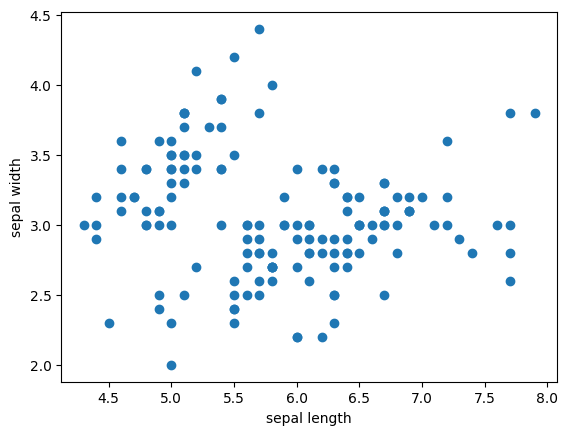

In [8]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

In [9]:
x_setosa = df[df['species']=='setosa']
x_versicolor = df[df['species']=='versicolor']
x_virginica = df[df['species']=='virginica']

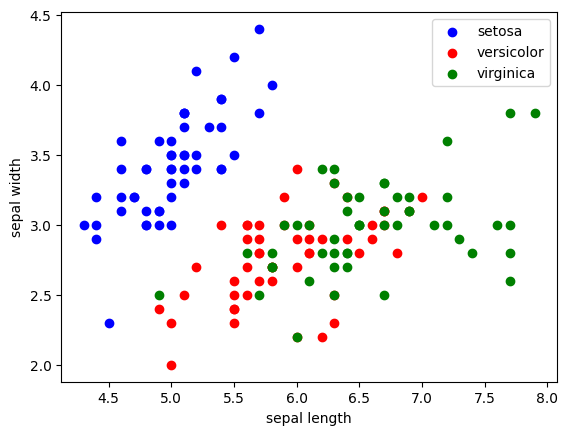

In [10]:
plt.scatter(x_setosa['sepal length (cm)'] , x_setosa['sepal width (cm)'] , color = 'blue' , label='setosa')
plt.scatter(x_versicolor['sepal length (cm)'] , x_versicolor['sepal width (cm)'] , color = 'red' , label='versicolor')
plt.scatter(x_virginica['sepal length (cm)'] , x_virginica['sepal width (cm)'] , color = 'green' , label='virginica')

plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()
plt.show()

In [11]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa


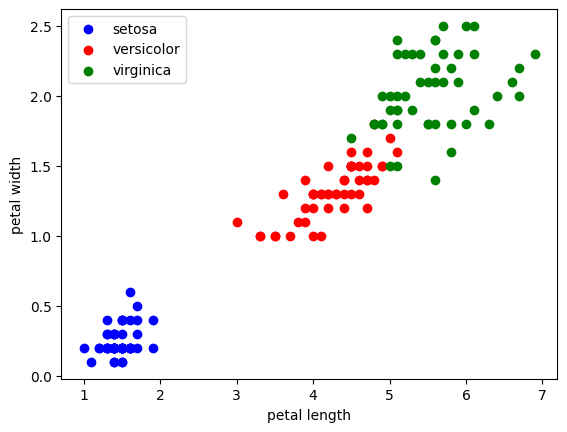

In [12]:
plt.scatter(x_setosa['petal length (cm)'] , x_setosa['petal width (cm)'] , color = 'blue' , label='setosa')
plt.scatter(x_versicolor['petal length (cm)'] , x_versicolor['petal width (cm)'] , color = 'red' , label='versicolor')
plt.scatter(x_virginica['petal length (cm)'] , x_virginica['petal width (cm)'] , color = 'green' , label='virginica')

plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()
plt.show()

here we have ploted our data both with respect to sepal and petal length/width , our observation :

- setosa can be easily classified from virginica and versicolor from both sepal and petal length/width
- versicolor and virginica cannot be classified with the help ho sepal length/width , but we can clearly see an boundary between versicolor and verginica in the scatter plot between petal length/width

In [17]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


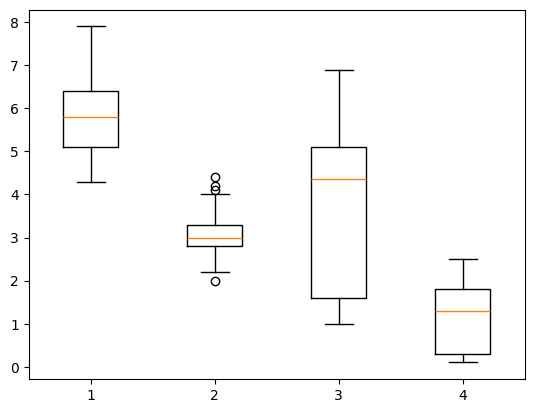

In [15]:
plt.boxplot(df.drop(columns='species'))
plt.show()

observation : 

- we can see that there are no outliers in our dataset 

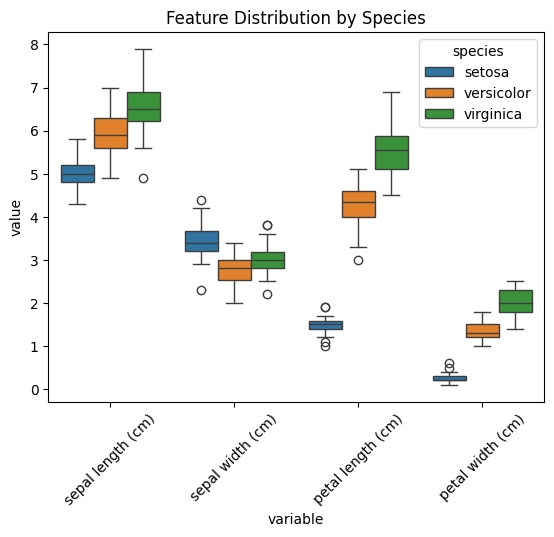

In [22]:
df_melted = df.melt(id_vars=['species'], value_vars=[col for col in df.columns if col != 'species'])
sns.boxplot(data=df_melted, x='variable', y='value', hue='species')
plt.xticks(rotation=45)
plt.title('Feature Distribution by Species')
plt.show()

In [25]:
df_melted.tail()

,species,variable,value
595,virginica,petal width (cm),2.3
596,virginica,petal width (cm),1.9
597,virginica,petal width (cm),2.0
598,virginica,petal width (cm),2.3
599,virginica,petal width (cm),1.8


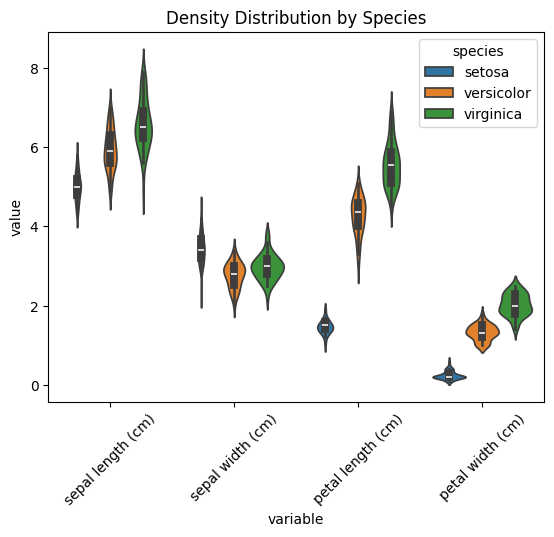

In [26]:
sns.violinplot(data=df_melted, x='variable', y='value', hue='species')
plt.xticks(rotation=45)
plt.title('Density Distribution by Species')
plt.show()

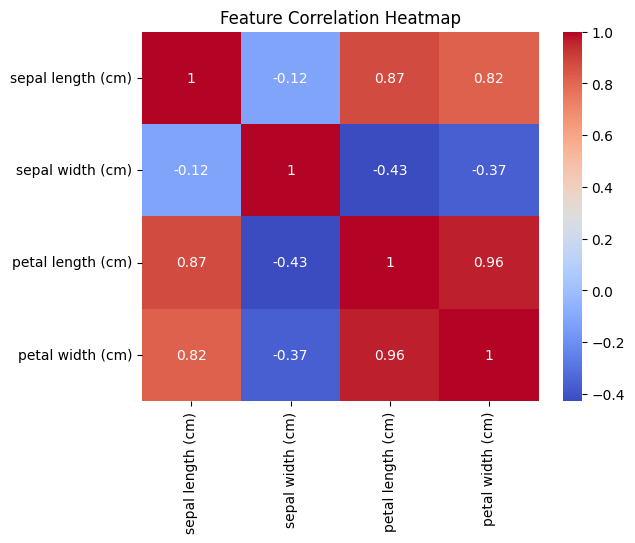

In [27]:
numeric_cols = [col for col in df.columns if col != 'species']
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()